In [7]:
import sys, glob
import numpy as np
import xarray as xr
import xscale.spectral.fft as xfft
import xscale 
import Wavenum_freq_spec_func as wfs
import time

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
from matplotlib.colors import LogNorm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


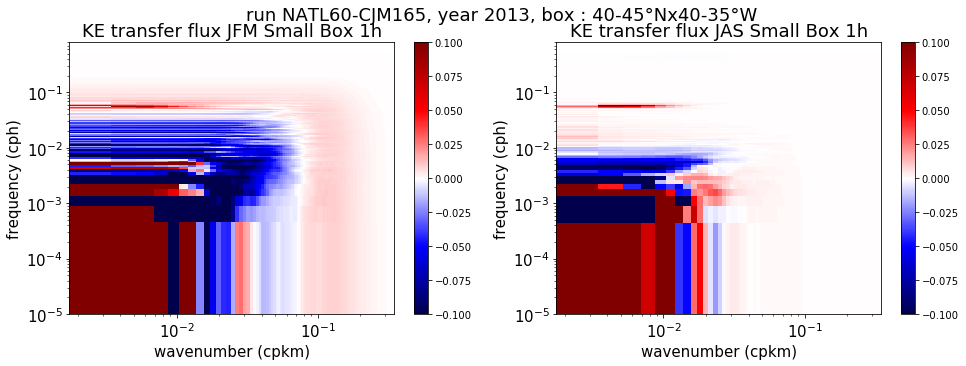

In [10]:
#Open netcdf

ds_JFM=xr.open_dataset('../pangeo-deployments-test/KE_Transfer_Flux_JFM_w_k_from_1h_NATL60-CJM165.nc')
ds_JAS=xr.open_dataset('../pangeo-deployments-test/KE_Transfer_Flux_JAS_w_k_from_1h_NATL60-CJM165.nc')

wavenumber_JFM=ds_JFM['wavenumber']
ffrequency_JFM=ds_JFM['frequency']
flux_JFM=ds_JFM['flux']

wavenumber_JAS=ds_JAS['wavenumber']
ffrequency_JAS=ds_JAS['frequency']
flux_JAS=ds_JAS['flux']

sec_to_hour = 3600.0

cmap = div_cmap

fig=plt.figure(figsize=(16,5))

ax = plt.subplot(121)
plt.pcolormesh(wavenumber_JFM,sec_to_hour*ffrequency_JFM,10*flux_JFM,cmap=cmap,vmin=-0.1,vmax=0.1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(wavenumber_JFM.min(),wavenumber_JFM.max())
ax.set_ylim(1E-5,8E-1)
ax.set_title('KE transfer flux JFM Small Box 1h',size=18)
ax.tick_params(labelsize=15)
plt.legend
plt.colorbar()

ax = plt.subplot(122)
plt.pcolormesh(wavenumber_JAS,sec_to_hour*ffrequency_JAS,10*flux_JAS,cmap=cmap,vmin=-0.1,vmax=0.1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(wavenumber_JAS.min(),wavenumber_JAS.max())
ax.set_ylim(1E-5,8E-1)
ax.set_title('KE transfer flux JAS Small Box 1h',size=18)
ax.tick_params(labelsize=15)
plt.legend
plt.colorbar()

plt.suptitle('run NATL60-CJM165, year 2013, box : 40-45°Nx40-35°W',size=18)
plt.savefig('KE_transfer_flux_natl60_JFM-JAS_smallbox.png')